# Импорт модулей

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import warnings
from datetime import datetime


# Отключение предупреждений
warnings.filterwarnings('ignore')

# Сессия 1
## 1.1 ЗАГРУЗКА ДАННЫХ 


In [2]:
df = pd.read_csv('./real_estate_data.csv')
df.head(4)

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

## 1.2 ПРЕДОБРАБОТКА ДАННЫХ
### Анализ данных
#### Информация о размере таблицы

In [4]:
df.shape

(403487, 17)

### Очистка дынных
#### Удаление пустых запясей

In [5]:
print(f'Колличество запясий до удаления пустых значений:', df.shape[0])
df.dropna(how='all', inplace=True)
print(f'Колличество запясий после удаления пустых значений:', df.shape[0])

Колличество запясий до удаления пустых значений: 403487
Колличество запясий после удаления пустых значений: 403487


#### Удалдение дубликатов

In [73]:
print(f'Колличество запясий до удаление дубликатов:', df.shape[0])
df=df.drop_duplicates()
print(f'Колличество запясий до удаление дубликатов:', df.shape[0])

Колличество запясий до удаление дубликатов: 403487
Колличество запясий до удаление дубликатов: 403487


In [6]:
# Поля обектных типов
objList = df.select_dtypes(include = "object").columns
objList

Index(['type', 'sub_type', 'start_date', 'end_date', 'building_age',
       'total_floor_count', 'floor_no', 'room_count', 'address',
       'heating_type', 'price_currency'],
      dtype='object')

In [7]:
df.describe()

,id,listing_type,tom,size,furnished,price
count,403487.00000,403487.000000,403487.000000,257481.000000,0.0,4.027720e+05
mean,201744.00000,1.294235,57.022739,279.349094,NaN,3.546417e+05
std,116476.80837,0.467733,44.358933,9429.195331,NaN,4.809503e+06
min,1.00000,1.000000,0.000000,1.000000,NaN,-2.500000e+02
25%,100872.50000,1.000000,29.000000,85.000000,NaN,2.500000e+03
50%,201744.00000,1.000000,40.000000,110.000000,NaN,1.990000e+05
75%,302615.50000,2.000000,90.000000,140.000000,NaN,3.420000e+05
max,403487.00000,3.000000,180.000000,948235.000000,NaN,2.000000e+09


#### Очистка даты

In [8]:
df["start_date"]=pd.to_datetime(df["start_date"])
df["end_date"]=pd.to_datetime(df["end_date"])

In [9]:
df["start_date_year"]=df.start_date.dt.strftime('%Y').astype(float)
df["start_date_month"]=df.start_date.dt.strftime('%m')
df.drop(columns=["start_date","end_date"],inplace=True)

#### Проценты пустых значений в столбцах

In [10]:
for i in df.columns:
    print(f'{i} - {df[i].isna().sum() / 403487 * 100}%')

id - 0.0%
type - 0.0%
sub_type - 0.0%
listing_type - 0.0%
tom - 0.0%
building_age - 6.788322796025646%
total_floor_count - 6.944709494977533%
floor_no - 8.7477415629252%
room_count - 0.0%
size - 36.18604812546625%
address - 0.0%
furnished - 100.0%
heating_type - 6.932069682542437%
price - 0.1772052135508703%
price_currency - 0.1772052135508703%
start_date_year - 0.0%
start_date_month - 0.0%


#### Тепловая карта пропусков

In [80]:
#sns.heatmap(df.isna().transpose())

### Удаление пустых столбцов

In [11]:
# Слишком много пропусков
df.drop('furnished', axis=1, inplace=True)

In [12]:
# Нет разных значений
print(df['type'].value_counts())
df.drop('type', axis=1, inplace=True)

Konut    403487
Name: type, dtype: int64


### Частота встречаемых колличест комнат

Text(0, 0.5, 'Frequency')

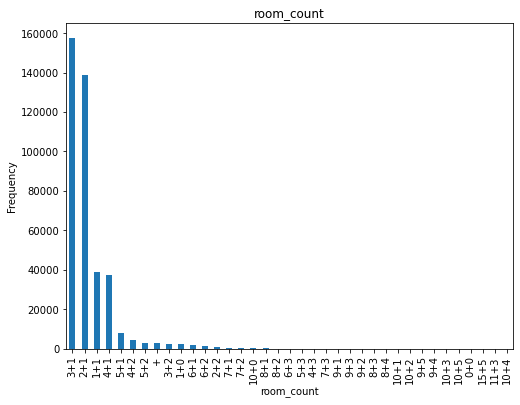

In [13]:
ax=df["room_count"].value_counts().plot(kind="bar",figsize=(8,6),title="room_count")
ax.set_xlabel("room_count")
ax.set_ylabel("Frequency")

In [84]:
number_of_rooms=df.groupby("room_count").size().sort_values(ascending=False).to_frame()
number_of_rooms_biggerthan150=number_of_rooms[number_of_rooms[0]>150].index
df = df[df.room_count.isin(number_of_rooms_biggerthan150)]

### Частота встречаемых номеров этажей

Text(0, 0.5, 'Frequency')

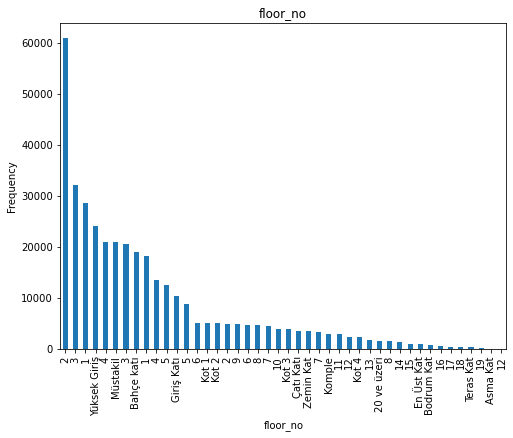

In [85]:
ax=df["floor_no"].value_counts().plot(kind="bar",figsize=(8,6),title="floor_no")
ax.set_xlabel("floor_no")
ax.set_ylabel("Frequency")

In [14]:
list_change=['16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','30  and more than']
for x in list_change:
    df.loc[(df.floor_no == x),'floor_no']="+15"
df.groupby("floor_no").size().sort_values(ascending=False)

floor_no
2               60914
3               32200
1               28569
Yüksek Giriş    24045
Müstakil        21165
4               21049
3               20490
Bahçe katı      19065
1               18187
4               13416
5               12495
Giriş Katı      10431
5                8698
6                5116
Kot 1            5036
Kot 2            4987
2                4950
9                4855
6                4631
8                4608
7                4398
10               3863
Kot 3            3793
Çatı Katı        3566
Zemin Kat        3441
7                3300
Komple           2958
11               2894
12               2308
Kot 4            2269
13               1702
20 ve üzeri      1563
8                1491
+15              1484
14               1328
15                911
En Üst Kat        894
Bodrum Kat        815
Teras Kat         293
Asma Kat           12
12                  1
dtype: int64

In [15]:
floor_location=df.groupby("floor_no").size().sort_values(ascending=False).to_frame()

floor_location_biggerthan200=floor_location[floor_location[0]>200].index

df = df[df.floor_no.isin(floor_location_biggerthan200)]

Text(0, 0.5, 'Frequency')

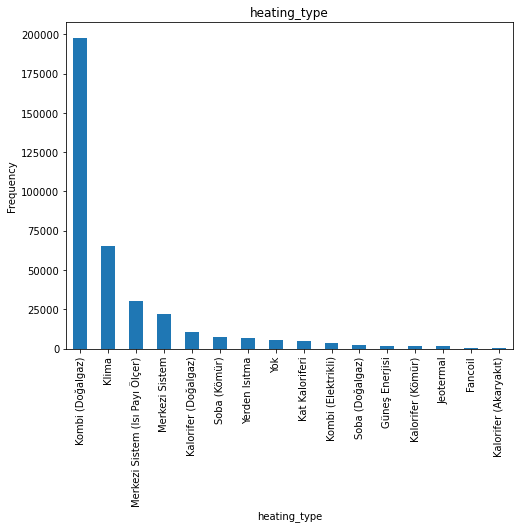

In [16]:
ax=df["heating_type"].value_counts().plot(kind="bar",figsize=(8,6),title="heating_type")
ax.set_xlabel("heating_type")
ax.set_ylabel("Frequency")

In [17]:
heating=df.groupby("heating_type").size().sort_values(ascending=False).to_frame()

heating_biggerthan100=heating[heating[0]>100].index

data = df[df.heating_type.isin(heating_biggerthan100)]

Text(0, 0.5, 'Frequency')

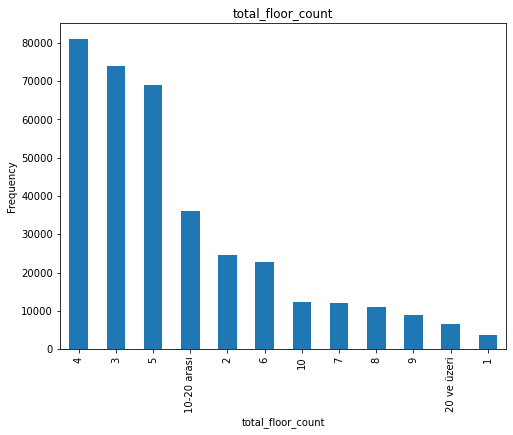

In [18]:
ax=df["total_floor_count"].value_counts().plot(kind="bar",figsize=(8,6),title="total_floor_count")
ax.set_xlabel("total_floor_count")
ax.set_ylabel("Frequency")

In [19]:
number_of_bathrooms=df.groupby("total_floor_count").size().sort_values(ascending=False).to_frame()

number_of_bathrooms_biggerthan200=number_of_bathrooms[number_of_bathrooms[0]>200].index

data = df[df.total_floor_count.isin(number_of_bathrooms_biggerthan200)]

In [20]:
df['size'].fillna(df['size'].mean(), inplace=True)
#df['price'].fillna(df['price'].mean(), inplace=True)
#df['end_date'].fillna(df['end_date'].mode()[0], inplace=True)
#df['building_age'].fillna(df['building_age'].mode()[0], inplace=True)

df.dropna(subset=['building_age'], inplace=True)
df.dropna(subset=['price'], inplace=True)
#df.dropna(subset=['address_district'], inplace=True)
#df.dropna(subset=['address_county'], inplace=True)
#df.dropna(subset=['address_city'], inplace=True)

#df['room_count_separately'].fillna(df['room_count_separately'].mode()[0], inplace=True)
#df['livingroom_count_separately'].fillna(df['livingroom_count_separately'].mode()[0], inplace=True)
#df['floor_no'].fillna(df['floor_no'].mode()[0], inplace=True)

df['total_floor_count'].fillna(df['total_floor_count'].mode()[0], inplace=True)
df['floor_no'].fillna(df['floor_no'].mode()[0], inplace=True)
df['heating_type'].fillna(df['heating_type'].mode()[0], inplace=True)
df['price_currency'].fillna(df['price_currency'].mode()[0], inplace=True)

### Категориальные признаки

In [21]:
objList2 = df.select_dtypes(include = "object").columns
print (objList2)

Index(['sub_type', 'building_age', 'total_floor_count', 'floor_no',
       'room_count', 'address', 'heating_type', 'price_currency',
       'start_date_month'],
      dtype='object')


In [22]:
#data_new=pd.get_dummies(df,columns=objList2,drop_first=True)
#data_new.columns

In [23]:
df['floor_no']=df['floor_no'].astype(str)
df['floor_no'] = LabelEncoder().fit_transform(df['floor_no'])

In [24]:
fields = [
    'building_age',
    'total_floor_count',
    'room_count',
    'address',
    'heating_type',
    'price_currency',
    'start_date_month',
    'sub_type',
    'price_currency',
]
for col in fields:
    df[col] = LabelEncoder().fit_transform(df[col])

#df

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361516 entries, 0 to 388924
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 361516 non-null  int64  
 1   sub_type           361516 non-null  int64  
 2   listing_type       361516 non-null  int64  
 3   tom                361516 non-null  int64  
 4   building_age       361516 non-null  int64  
 5   total_floor_count  361516 non-null  int64  
 6   floor_no           361516 non-null  int64  
 7   room_count         361516 non-null  int64  
 8   size               361516 non-null  float64
 9   address            361516 non-null  int64  
 10  heating_type       361516 non-null  int64  
 11  price              361516 non-null  float64
 12  price_currency     361516 non-null  int64  
 13  start_date_year    361516 non-null  float64
 14  start_date_month   361516 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 44.1 MB


# Сохранение данных

In [26]:
df.to_csv('./real_estate_data_clean.csv', index=False)